Note: Difference between Ensemble Learning and cross validation:
        
        1. Ensemble Learning: Columns are sampled. Resampling with Replacement
            Random Features are selected and multiple models are trained.
            Agggregate scores of the multiple models is selected for final predictions.
            Features may repeat.
            Overfitting is avoided as each of the models are weak learners.
            
        2. Cross Validation: Row are sampled
            Rows are selected based on cv and models are built.
            Agggregate of the scores is seelcted for final predictions.
            We usually do Cross Validation as train_test_split may simply miss out some important predictions.
            
            Random Forest is also a bagging technique which comes under ensemble learning.

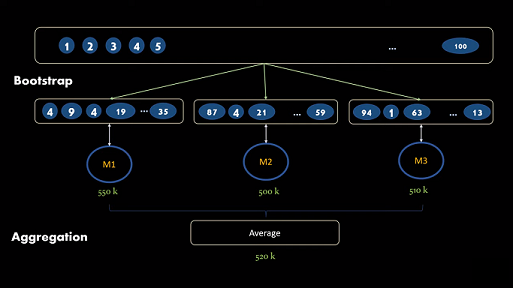

Differene between Bagging and bagged trees:

    Bagging: Underlying model can be anything(SVM,log regression,knn etc).
    Bagged Trees: Each model is a tree.ex: Random Forest.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


__Data Exploration__

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.Outcome.value_counts() # __Checking imbalance in y values__

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
268/500 # There is some imbalance in y values. We will deal with this in train_test_split

0.536

In [13]:
X = df.drop('Outcome', axis = 'columns')
y = df.Outcome

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

__Scaling - Standard Scaler__

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

__Traintest Splitting using Stratify__

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,stratify=y,random_state=10) # (flattened 2d array,1d array)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [21]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [23]:
201/375 # compare with y_test. Ratio is same for 1 and 0.

0.536

In [22]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [24]:
67/125 # compare with y_train. Ratio is same for 1 and 0.

0.536

__Decision Tree: standalone model__ 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
score

array([0.67532468, 0.66233766, 0.7012987 , 0.77777778, 0.73856209])

In [26]:
score.mean()

0.7110601816484169

__Bagging Technique: Without CrossValidation__

In [27]:
from sklearn.ensemble import BaggingClassifier
bagged_model= BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                 n_estimators=100,       # 100 models selected 
                 max_samples = 0.80,     # 80 percent of columns 
                 oob_score=True, # sample which did not appear in any of the model will be considered for test          
                 random_state = 2)    

In [28]:
bagged_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=2)

In [30]:
bagged_model.oob_score_ #score of the leftover test samples. 

0.7517361111111112

In [31]:
bagged_model.score(X_test,y_test) # score of test set

0.7760416666666666

__Bagging Technique: With CrossValidation__

In [33]:
from sklearn.ensemble import BaggingClassifier
bagged_modelCV= BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                 n_estimators=100,       # 100 models selected 
                 max_samples = 0.80,     # 80 percent of columns 
                 oob_score=True, # sample which did not appear in any of the model will be considered for test          
                 random_state = 2)  

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(bagged_modelCV,X,y,cv=5)
score

array([0.75324675, 0.74025974, 0.73376623, 0.81699346, 0.75163399])

In [35]:
score.mean()

0.7591800356506239

__Random Forest Classifier__

    Underneath the random forest classifier uses the baggging techniques.
    sklearn.ensemble is used while importing, which means it belongs to the bagging technique.

In [37]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(),X,y,cv =5)
scores

array([0.76623377, 0.74675325, 0.75974026, 0.83660131, 0.76470588])

In [38]:
scores.mean()

0.7748068924539513